In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import SGDRegressor 
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

### Read data from csv file

In [20]:
df = pd.read_csv('../../data/processed/canomical_data.csv')
df.head()

,p_categories,p_brand,p_day_created,p_sold_quantity,p_original_price,p_discount_rate
0,7,155,659.0,702,528000,49
1,84,198,974.0,12844,799000,46
2,84,192,1372.0,938,209000,0
3,7,155,593.0,10359,473000,50
4,15,145,529.0,2338,106000,16


### Train test split

In [21]:
X = df.drop('p_sold_quantity', axis='columns')
y = testLabels = df.p_sold_quantity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

### Randomized search for hyperparameter tuning of SGDRegressor 

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

def SGDregression():
    return make_pipeline(StandardScaler(), SGDRegressor())


param_grid = {'sgdregressor__loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 
              'sgdregressor__penalty': ['l2', 'l1']}

rnd_search = RandomizedSearchCV(SGDregression(), param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=15)
rnd_search.fit(X_train, y_train)
rnd_search.best_params_

{'sgdregressor__penalty': 'l2', 'sgdregressor__loss': 'squared_loss'}

- It definitely depends on random_state. The higher random_state, the fewer MSE. 

### Train model

In [23]:
clf = SGDRegressor(loss='squared_loss', penalty='l2')
clf.fit(X_train, y_train)

SGDRegressor()

### Predict model

In [24]:
y_pred = clf.predict(X_test)

### Visualize model result

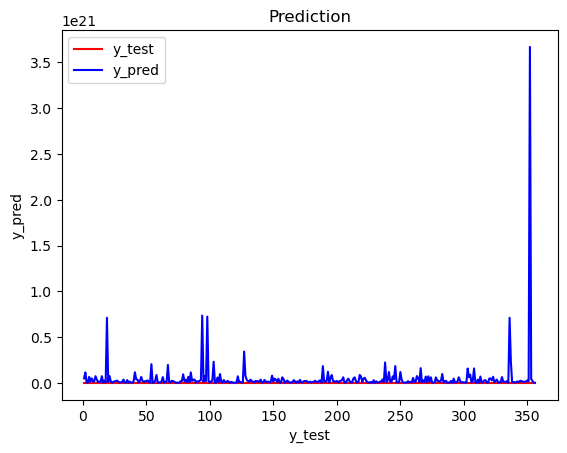

In [25]:
plot_predict = [i for i in range (1, len(y_test) + 1, 1)]
plt.plot(plot_predict,y_test, color='red', linestyle='-')
plt.plot(plot_predict,y_pred, color='blue', linestyle='-')
plt.legend(['y_test', 'y_pred'])
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Prediction')
plt.show()

### Plot error distribute

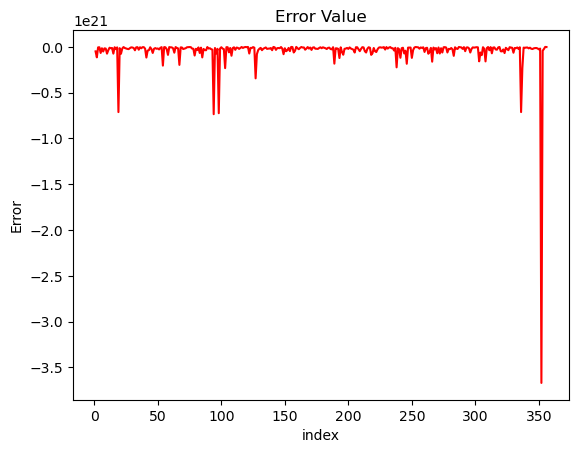

In [26]:
plot_error = [i for i in range(1, len(y_test) + 1, 1)]
plt.plot(plot_error, y_test - y_pred, color='red', linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [27]:
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  4.614723229934231e+40
RMSE:  2.1481906875168765e+20


- Comments:
    - Compare to Linear Regression, SGD Regression is more robust to outliers.